___

<center><h1>Análisis Posicionamiento Youtube</h1></center>

___

<center><h2>Pragma</h2></center><br>
<center> Assessment Consultor Cientifico de Datos </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presentado por:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>

<center>Mayo 2025</center>
<p></p>

In [2]:
# --- Import necessary libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
# --- Load and prepare data ---
df = pd.read_csv('../data/cleaned_youtube_data.csv')

In [4]:
# --- Feature Engineering for Clustering ---
# Select relevant features for clustering
features = ['views', 'likes', 'dislikes', 'comment_count']
X = df[features]

In [5]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# --- Find optimal number of clusters ---
# Calculate silhouette scores for different k values
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

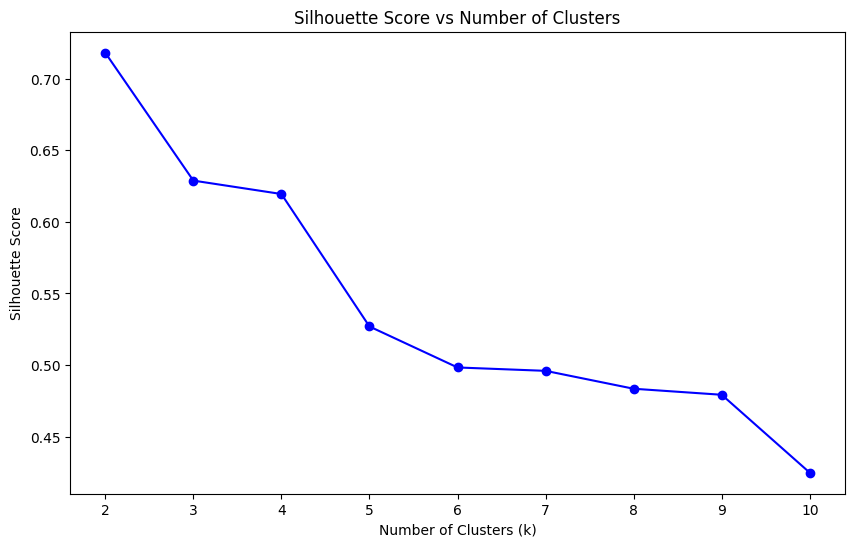

In [7]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [8]:
# --- Perform K-means clustering with optimal k ---
optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
# --- Analyze clusters ---
# Calculate cluster statistics
cluster_stats = df.groupby('cluster')[features].mean()
print("\nCluster Statistics:")
print(cluster_stats)


Cluster Statistics:
                views          likes     dislikes  comment_count
cluster                                                         
0        8.176545e+05   22792.193001   860.178003    2328.564711
1        5.487632e+06  172255.922546  6737.692694   16193.172493


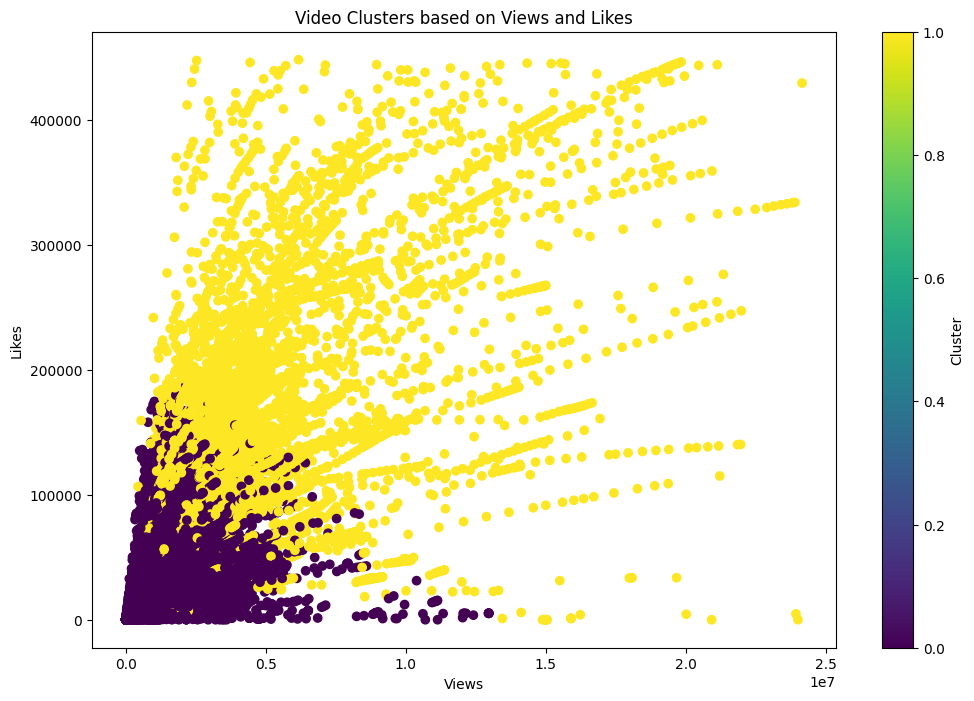

In [10]:
# --- Visualize clusters ---
# Create a scatter plot of views vs likes, colored by cluster
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['views'], df['likes'], c=df['cluster'], cmap='viridis')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Video Clusters based on Views and Likes')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [11]:
# --- 3D visualization using plotly ---
fig = px.scatter_3d(df, 
                    x='views', 
                    y='likes', 
                    z='comment_count',
                    color='cluster',
                    title='3D Cluster Visualization')
fig.show()